### Fill in your name, student id number and email address
#### name: Konsta Nyman
#### student id: 523834
#### email: kokany@utu.fi

## Data analysis and knowledge discovery - Exercise 3: Unsupervised learning

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

This exercise uses the wine dataset, available on moodle as `ex3_wine.csv`. The features are all numeric. They quantify chemical properties of wine, grown around the same area in Italy. The feature names are listed in the table below.

| Feature | Type 
| :--- | ---: 
| Alcohol | Numeric (float)
| Malic acid | Numeric (float)
| Ash | Numeric (float)
| Alcalinity of ash | Numeric (float)
| Magnesium | Numeric (integer)
| Total phenols | Numeric (float)
| Flavanoids | Numeric (float)
| Nonflavanoid phenols | Numeric (float)
| Proanthocyanins | Numeric (float)
| Color intensity | Numeric (float)
| Hue | Numeric (float)
| OD280/OD315 of diluted wines | Numeric (float)
| Proline | Numeric (integer)


In real applications, visualizing various aspects of the data the data and data scrubbing are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods.

Please consider the following things when returning your notebook:

 - As in the two previous exercises, the grading scale is failed/passed/passed with honors.
 - **For a passing grade, Parts 1-3 must be complete**, and all questions in each of them should be answered. Some mistakes are allowed as long as you clearly attempt to solve all the exercises.
 - For completing Parts 1-3 and the optional bonus Part 4 sufficiently well, you will be awarded one bonus point for the exam.
 - All the cells in the finished notebook should run without crashing. Please delete unnecessary cells. As a good rule of thumb, use **"Restart Kernel and Run All Cells"** on your finished notebook to make sure it runs without errors and produces the expected output.
 - Comment your code to explain how it works and what you intend for it to do.
 - Answer the questions asked in the assignments in Markdown cells.
 - If you're having trouble with this exercise, try an online search first, but **don't just copy-paste code you find**. See exercise guidelines in the Moodle page of this course. If you can't find a solution to your problem, **ask for advice at the exercise sessions** or in the course discussion forum on Moodle or email oskari.s.heikkinen@utu.fi.
 - If/when you look things up during this exercise, please **cite your sources**, e.g. a link to a web page. It's better to cite too much than too little.
 - **We don't encourage using a large language model (LLM) such as ChatGPT while doing these exercises.** However, if you do use an LLM, be critical of its output. Understand any code the LLM produced before using the code, don't just copy-paste it. If you used one, write a short description of how you used the LLM in the context of these exercises (what was your input, how did you benefit from the output?)

### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional modules here if you want.

In [1]:
import itertools # has some utilities that may be useful in the exercise

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

# IPython magic command to display matplotlib figures together with the output
# (Often the default setting in a Jupyter Notebook context, so your figures probably work fine without it)
%matplotlib inline

### Part 0: Read the data

- Download the exercise 3 data on the Moodle page of this course. (`ex3_wine.csv`)
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [2]:
# load 'ex3_wine.csv' into a data frame
df_wine = pd.read_csv('ex3_wine.csv')

In [3]:
# basic info
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
# print five first rows
df_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet.
 - Does it look like there are clear clusters? Don't worry if they're hard to see. There may be more than one "correct" answer.
 - Draw shapes (for example `matplotlib.patches.Ellipse`) on top of the scatter plot to visualize any clusters you feel you can easily detect.

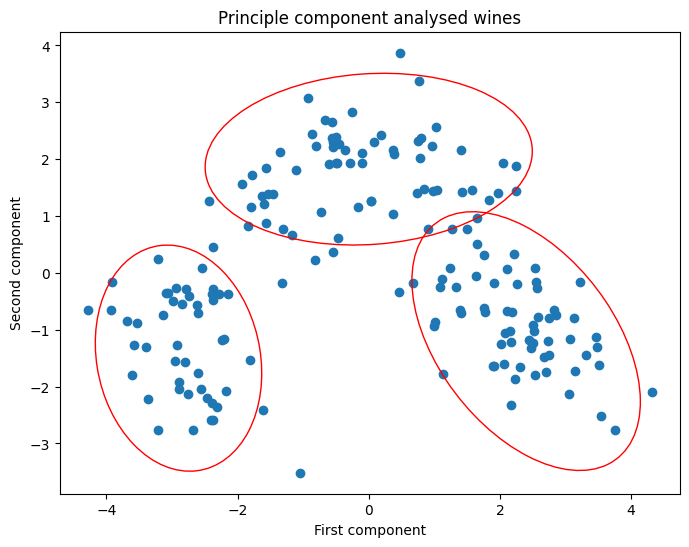

In [5]:
# z-score standardization

scaler = StandardScaler().fit(df_wine) #fit the scaler
df_wine = scaler.transform(df_wine) #normalize data


# pca
pca = PCA().fit(df_wine) #pca model
df_wine_pca = pd.DataFrame(pca.transform(df_wine)) #transform data into dataframe
exp_var_rat = pca.explained_variance_ratio_ #get the variances to see how much information is displayed with each component


# plot data
plt.figure(figsize=(8, 6))
plt.scatter(df_wine_pca[0], df_wine_pca[1])
plt.xlabel('First component')
plt.ylabel('Second component')
# create ellipses
ellipse1 = Ellipse(xy=(-2.9,-1.5), width=2.5, height=4, angle=8, edgecolor='r', facecolor='none')
ellipse2 = Ellipse(xy=(2.4,-1.2), width=2.8, height=5, angle=30, edgecolor='r', facecolor='none')
ellipse3 = Ellipse(xy=(0,2), width=5, height=3, angle=5, edgecolor='r', facecolor='none')
plt.gca().add_patch(ellipse1)
plt.gca().add_patch(ellipse2)
plt.gca().add_patch(ellipse3)
plt.title('Principle component analysed wines')
plt.show()

<font color = deepskyblue>It definitely looks like there is some clustering. Maybe two clusters that overlap in the middle, or even three clusters with the middle being its own cluster.</font>

### Part 2a: Agglomerative hierarchical clustering
 
 - Cluster the data into 2-10 clusters using agglomerative hierarchical clustering.
 - Try different values for the linkage parameter. (Ward, Single, Average and Complete)
 - Use the z-score standardized 13-dimensional data for clustering - **don't use the first two principal components for clustering!**
 - Explain why using the two principal components would be a bad idea for clustering.
 - Using silhouette score, evaluate the clustering performance for each linkage criterion and number of clusters combination. Sort the results by silhouette score.
 - Plot the data into a scatter plot again, this time colouring the data points according to the cluster they were assigned to. Use the best 6 clusterings according to silhouette score.
 - Do some of the clusterings discovered by agglomerative hierarchical clustering correspond to what visually looked like clusters to you in Part 1? It's absolutely fine if they don't.


*Tip: you can use `itertools.product` function to get the Cartesian product of the two lists of hyperparameters (number of clusters, linkage criterion)*

*Note: it's a common mistake to think that the points in the scatter plot should move when clustering, but they should not. Clustering can be visualized simply by colouring data points on an existing plot.*

In [6]:
# create two lists for iteration purposes
clusters = [*range(10,1,-1)]
linkages = ['ward', 'single', 'average', 'complete']

# create a list for the tuples of combinations
combs = []

product = itertools.product(clusters, linkages) #create cartesian product (list of tuples)

# loop different combinations
for comb in product:
    h_cluster = AgglomerativeClustering(n_clusters=comb[0], linkage=comb[1]) #create model
    preds = h_cluster.fit_predict(df_wine_pca) #fit and predict
    score = silhouette_score(df_wine_pca, preds) #calculate silhouette score
    t = (score, ) #create tuple out of score
    comb += t #tie scores to existing tuples
    combs.append(comb) #add tuple to list

# sort the list of combinations
sorted_combs = sorted(combs, key=lambda x: x[2], reverse=True)

# print variances to show importance of many clusters
print(exp_var_rat)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


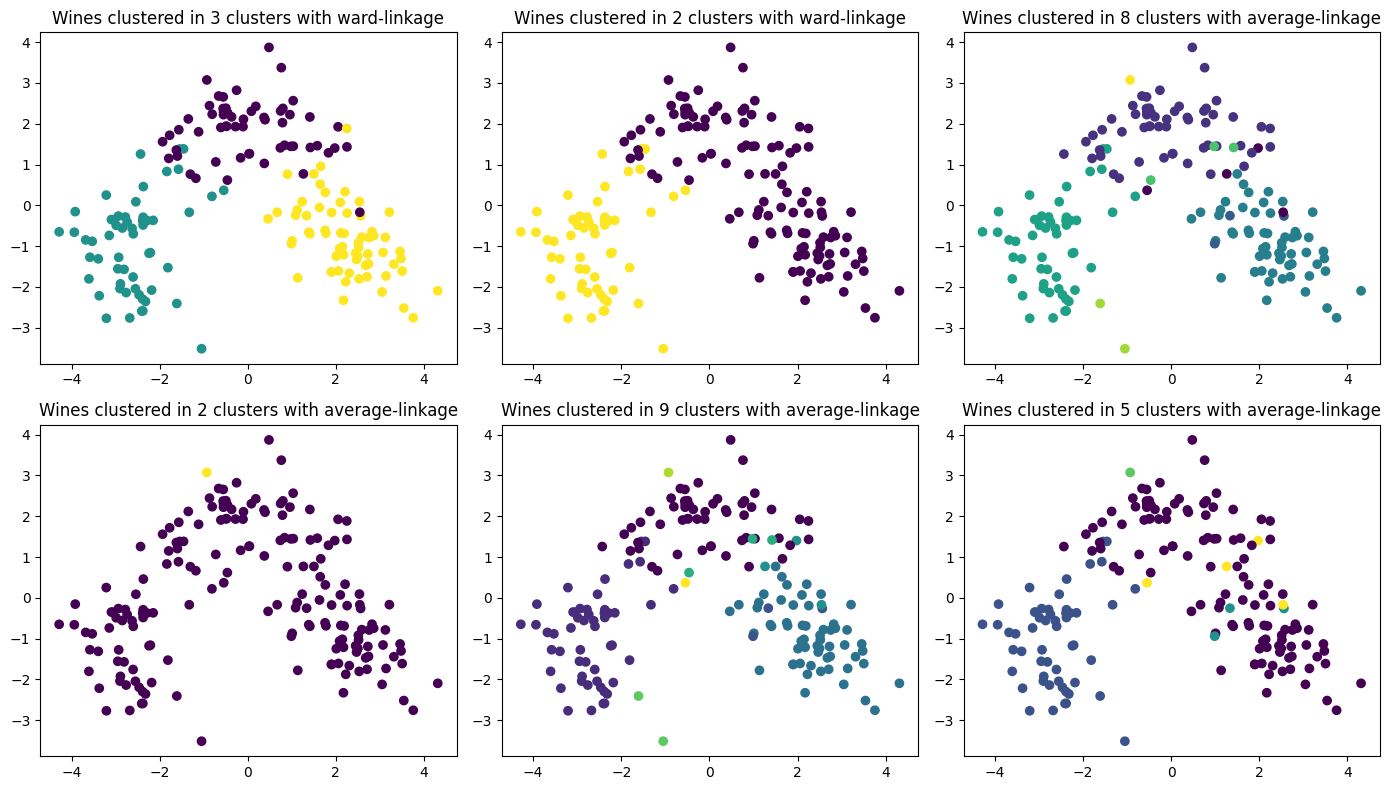

In [7]:
# plot the data with the six best combinations
fig, axes = plt.subplots(2,3, figsize=(14,8))

for i in range(2):
    for j in range(3):
        # set correct clusters and linkages in loop
        if i == 0:
            n = sorted_combs[j][0]
            l = sorted_combs[j][1]
        else:
            n = sorted_combs[j+3][0]
            l = sorted_combs[j+3][1]

        h_cluster = AgglomerativeClustering(n_clusters=n, linkage=l) #create model
        preds = h_cluster.fit_predict(df_wine_pca) #fit and predict
        axes[i, j].scatter(df_wine_pca[0], df_wine_pca[1], c=preds) #fit plot to axes with coloring
        axes[i, j].set_title(f"Wines clustered in {n} clusters with {l}-linkage") #title

plt.tight_layout()

<font color = deepskyblue>You could definitely use only two components for clustering but it has some drawbacks. Quite a lot of information is lost and the benefit of using less components in terms of load is too small to consider it being a good option. We can see form the explained variances that only a little over half of the information is with the first two components. 

The very first one looks exactly like I visioned. And the second one very closely resembles the other idea that I had.</font>

### Part 2b: Dendrograms

 - Plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix. *Hint: while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (`scipy.cluster.hierarchy.linkage`).*
 - Compute the linkage matrix using Ward and Single linkage, and plot the dendrograms using `scipy.cluster.hierarchy.dendrogram`.
 - Truncate the dendrogram for better readability. You may choose how exactly you want to do the truncation.
 - How do you interpret the dendrograms? How do they differ?

*Note: when truncating a dendrogram, a number in parentheses refers to the amount of samples in a subtree. A number without parentheses is the index of a single sample*

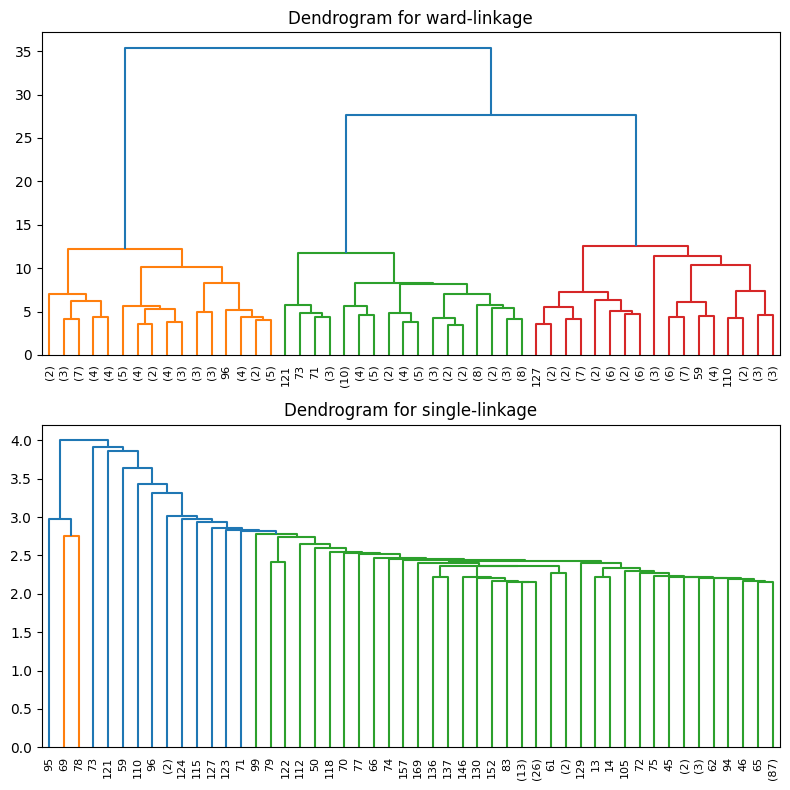

In [8]:
# figure
fig, axes = plt.subplots(2, figsize=(8,8))

# dendogram for ward linkage
link_data = linkage(df_wine_pca, method='ward')
dendrogram(link_data, truncate_mode='lastp', p=50, ax=axes[0])
axes[0].set_title("Dendrogram for ward-linkage")

# dendogram for ward linkage
link_data = linkage(df_wine_pca, method='single')
dendrogram(link_data, truncate_mode='lastp', p=50, ax=axes[1])
axes[1].set_title("Dendrogram for single-linkage")

plt.tight_layout()


<font color = deepskyblue>The dendrograms differ significantly. Using truncate level 50, we can see that ward-linkage starts to form similar clusters very early on. It combines similar sized clusters.

Single linkage combines single points to larger clusters. We can see that even when only a few clusters remain, single points still form their own clusters. With three clusters, one of the clusters is still a single point.</font>

### Part 3: _k_-means clustering

 - Perform _k_-means clustering on the data. Try 2-10 numbers of clusters.
 - Evaluate the clustering performance using silhouette score.
 - Choose the best 3 numbers of clusters according to silhouette score that you discovered above, and once again visualize them on a scatter plot of the first two principal components.
 - Display the centroids of the clusters on the plot. Remember to transform the centroids to the PCA space. Explain why you need to transform the centroids.

In [9]:
# list of clusters, score tuples
cluster_scores = []

# loop different amount of clusters
for n in range(2,11):
    k_cluster_model = KMeans(n_clusters=n, n_init='auto') #create model
    preds = k_cluster_model.fit_predict(df_wine_pca) #fit and predict
    score = silhouette_score(df_wine_pca, preds) #calculate silhouette score
    t = (n, score) #create tuple out of cluster amount and score
    cluster_scores.append(t) #add tuple to list

# sort the list of combinations
sorted_cluster_scores = sorted(cluster_scores, key=lambda x: x[1], reverse=True)

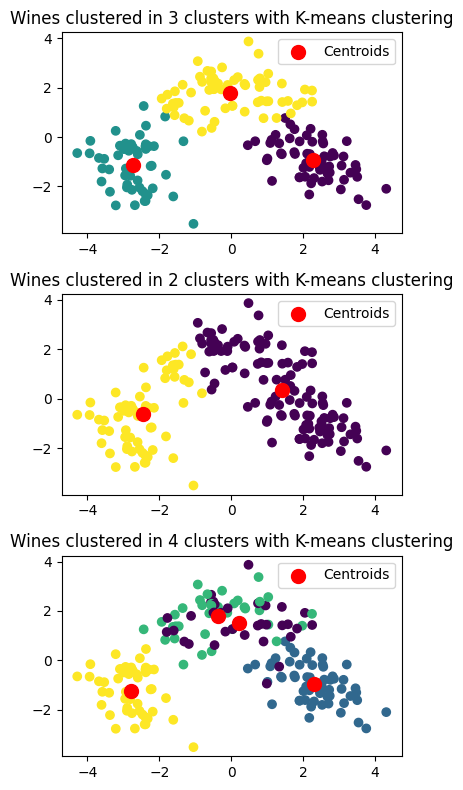

In [10]:
# plot three best cluster amounts
fig, axes = plt.subplots(3,1, figsize=(4,8))

for i in range(3):
    # set correct clusters and linkages in loop
    k_cluster_model = KMeans(n_clusters=sorted_cluster_scores[i][0], n_init='auto') #create model
    preds = k_cluster_model.fit_predict(df_wine_pca) #fit and predict
    centroids = k_cluster_model.cluster_centers_ #get centroids which are already in the PCA space
    axes[i].scatter(df_wine_pca[0], df_wine_pca[1], c=preds) #fit plot to axes with coloring
    axes[i].scatter(centroids[:, 0], centroids[:, 1], marker='o', s=100, c='red', label='Centroids')
    axes[i].set_title(f"Wines clustered in {sorted_cluster_scores[i][0]} clusters with K-means clustering") #title
    axes[i].legend()

plt.tight_layout()

<font color = deepskyblue>I'm not sure why I would need to transform the centroids into the PCA space. The whole clustering is done in the PCA space and I would think that the centroids that I get from the clusters are already in the PCA space as well.</font>

### Part 4 (BONUS): Filling in missing labels using clustering

In this bonus exercise, you're given a dataset with almost all of the labels are missing. This is the starting point in semi-supervised learning. Semi-supervised learning in general is beyond the scope of this course, but if you want you can learn more about it, starting e.g. on [the sklearn page for semi-supervised learning](https://scikit-learn.org/stable/modules/semi_supervised.html). **This exercise does not require researching semi-supervised learning, however.**

The dataset used in this exercise is a slightly modified version of [the seeds dataset](https://archive.ics.uci.edu/dataset/236/seeds). The features are different properties of wheat seeds. They are divided to three different classes, simply called `target1`, `target2` and `target3` here. The feature names and their data types are listed in the table below. **Use the modified dataset on Moodle, with the filename `ex3_seeds_missinglabels.csv`**

| Feature | Type 
| :--- | ---: 
| Area | Numeric (float)
| Perimeter | Numeric (float)
| Compactness | Numeric (float)
| Length | Numeric (float)
| Width | Numeric (float)
| Asymmetry Coefficient | Numeric (float)
| Length Groove | Numeric (float)
| Target | Categorical (nominal)

First, visualize the first two principal components of the dataset in a scatter plot, showing the labels real for data points you were given. Try to see if the labels look like they belong in what look like clusters on the plot.

Your task is to use clustering to assign labels to the rows that have an `unknown` value for their label. Do this by first clustering all of the data, and then filling in the unknown values based on which clusters the data points with known values tend to fit in. The details of how exactly you decide which rows get assigned which label are up to you - you can get creative. Describe and justify your thought process, though.

Use whichever clustering methods you prefer. You can cluster the data into 3 clusters because you have 3 known labels, but you could also try a higher number of clusters that you can then merge.

You are also given the full labels for the dataset in a separate file called `ex3_seeds_labels.csv`. Plot the real labels next to the labels that your clustering attempts predicted.

Finally, compute the adjusted Rand index for labels predicted by your clustering solutions and the real labels, and display it along the scatter plots. Rand index is a measure of similarity between two partitions of a set of elements. Adjusted Rand index is corrected for chance using the maximum and expected values of Rand index. Optionally, you can learn more about the Rand index e.g. on [the Wikipedia page for Rand index](https://en.wikipedia.org/wiki/Rand_index). Here you can simply use the `sklearn.metrics.adjusted_rand_score` method imported at the beginning of this notebook.